<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_06_31_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [19]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [20]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')


In [21]:
total_alpha_content = [ i / 1000 for i in range(1 , 901 ) ]
total_flat_content  = [ i for i in range(1 , 10 ) ]
total_location      = list(range( 10 , 16))

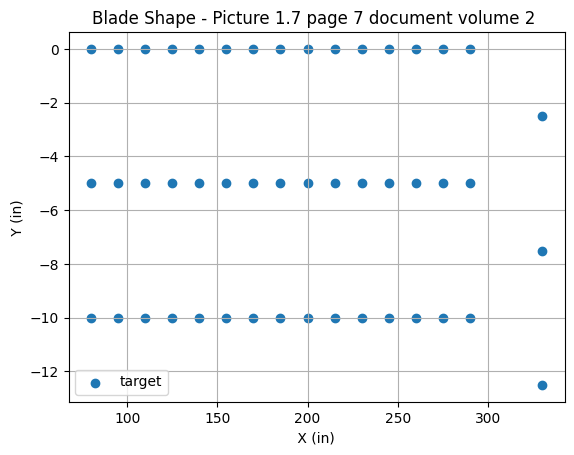

In [22]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()


In [30]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,
    'accuracy_random_forest' : []

}




In [ ]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health  = []
    params_fault   = []
    params_fault_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(20):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location = 0

          total_health_iter  = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []


          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              if select_location == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add








              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])

          #fig = plt.figure(figsize=(10 , 10 ))
          #ax0 = fig.add_subplot(1 , 3 , 1 , projection='3d' )
          #total_health_iter = np.array(total_health_iter)
          #total_health_iter = np.array(total_health_iter)
          #total_fault_iter = np.array(total_fault_iter)
          #total_fault_t_iter = np.array(total_fault_t_iter)
          print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")
          #ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='H' , s=20  , alpha = 0.3 , c='r' )
          #ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='F1' , c ='b' ,  s=10  , alpha = 0.4 )
          #ax0.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='F2' , c='aqua' ,  s=50  , alpha = 0.1  )
          #ax0.legend()
          #ax0.grid()
          #plt.show()




          new_data_simulated_        = np.array(new_data_simulated_)
          new_data_simulated_fault   = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t = np.array(new_data_simulated_fault_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error = []
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error.append(error)


          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]
          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault.append(error_Fault)

          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  1 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault.append(error_Fault)

          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]




#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'error' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )



    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'error' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'error' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )







    concat_2_df_health_fault = pd.concat([df_params , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.2  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)
    classifier_1 = RandomForestClassifier()
    classifier_1.fit(x_u_train , y_u_train )
    pre_random = classifier_1.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)


    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")

    if iter_flat == 1 :
      break

  if iter_alpha == 1  :
    break


iter_alpha : 0.001 | iter_flat : 1 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 0 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 1 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 2 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 3 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 4 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 5 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 6 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 7 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 8 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 9 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 10 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 11 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 12 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 13 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,  iteration : 14 
iter_alpha : 0.001 , flap: 1 , locate : 10 ,

In [25]:
df_fault_t

,X_,Y_,Z_
0,79.955856,0.013836,0.007786
1,79.959757,-4.987594,0.019546
2,79.956398,-9.987095,0.011903
3,95.016952,0.022231,0.021719
4,95.012528,-4.980755,0.018410
5,95.017640,-9.976792,0.016223
6,110.040464,0.053435,0.081679
7,110.039596,-4.950632,0.050361
8,110.043394,-9.942854,0.073327
9,125.058265,0.093843,0.124963


In [27]:
pd.DataFrame(total_simulation)

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,accuracy_random_forest
0,0.000768,NaN,-0.020682,0.040891,0.017196,-0.014598,0.044668,0.001,1,0.699074,0.666667
1,0.002947,NaN,0.011618,-0.034454,-0.003474,0.021565,-0.036588,0.001,2,0.694444,0.662037
2,0.001780,NaN,-0.004502,-0.014266,0.012277,0.030288,-0.000409,0.001,3,0.625000,0.666667
3,0.002823,NaN,-0.038378,0.001675,0.039944,0.000310,0.001501,0.001,4,0.671296,0.634259
4,0.007784,NaN,-0.040392,-0.035327,0.045961,-0.003473,-0.051113,0.001,5,0.643519,0.657407
5,0.003241,NaN,-0.004102,0.020741,0.005441,-0.018258,0.019164,0.001,6,0.689815,0.680556
6,0.004818,NaN,-0.014196,0.047488,0.018909,0.001385,0.064233,0.001,7,0.666667,0.689815
7,-0.003618,NaN,0.035884,0.008008,-0.038476,-0.014448,-0.000856,0.001,8,0.680556,0.643519
8,0.004693,NaN,-0.051136,0.018588,0.048769,-0.009693,0.014731,0.001,9,0.662037,0.643519
9,0.003459,NaN,0.000337,0.026429,0.000630,-0.023410,0.019112,0.002,1,0.675926,0.657407
